In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from statsmodels.formula.api import ols
%load_ext autotime

In [3]:
# df = pd.read_csv('data/kc_house_data.csv')

In [4]:
# import geopy.geocoders
# from geopy.geocoders import Nominatim
# geopy.geocoders.options.default_user_agent = 'kpmcdonough@gmail.com'
# geopy.geocoders.options.default_timeout = 7
# geolocator = Nominatim()
# print(geolocator.headers)
# print(geolocator.timeout)

In [5]:
# locator = Nominatim()
# coordinates = 47.7210, -122.319
# location = locator.reverse(coordinates)
# location.raw

In [6]:
# test_df = df.head()

In [7]:
# locator = Nominatim()

# def return_neighborhood(location):
#     if 'neighbourhood' in location['address'].keys():
#         return location['address']['neighbourhood']
#     elif 'suburb' in location['address'].keys():
#         return location['address']['suburb']
#     elif 'town' in location['address'].keys():
#         return location['address']['town']
#     elif 'hamlet' in location['address'].keys():
#         return location['address']['hamlet']
#     else:
#         return "N/A"

# test = []
# for row in df.index:
#     lat = df['lat'][row]
#     long = df['long'][row]
#     coords = lat,long
#     location = locator.reverse(coords)
#     location_dict = location.raw
#     test.append(return_neighborhood(location_dict))

# df


In [8]:
# test

In [9]:
# test[0]

In [10]:
# df['Neighborhood'] = 0
# df

# for row in df.index:
#     df["Neighborhood"][row] = test[row]
# df

In [11]:
# top_neighborhoods = df['Neighborhood'].value_counts()[0:251].index
# for row in df.index:
#     if df['Neighborhood'][row] in top_neighborhoods:
#         df['Neighborhood'][row] = df['Neighborhood'][row]
#     else:
#         df['Neighborhood'][row] = "Other"

In [12]:
# df["Neighborhood"].value_counts()

In [13]:
# for row in df.index:
#     if df['Neighborhood'][row] == "N/A":
#         df['Neighborhood'][row] = "Other"
# df['Neighborhood'].value_counts()

In [14]:
# df.to_csv('data/KC_with_hoods')

In [15]:
df = pd.read_csv('data/KC_with_hoods', index_col=0)

In [16]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
Neighborhood        0
dtype: int64

In [17]:
from sklearn.preprocessing import OrdinalEncoder

In [18]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [19]:
y = df["price"]
X = df.drop("price", axis=1)

In [20]:
cols = list(X.isna().sum().index)

In [21]:
relevant_cols = ['date','bedrooms','bathrooms','sqft_living','sqft_lot'\
                 ,'floors','waterfront','view','condition','grade','sqft_above', 'sqft_basement',\
                 'yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15','Neighborhood']

In [22]:
X = X[relevant_cols]

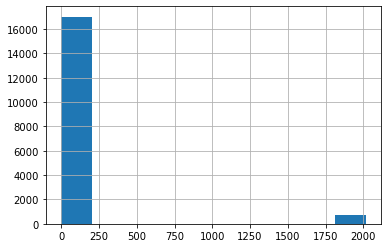

In [23]:
X['yr_renovated'].hist();

In [24]:
df['newly_renovated'] = df['yr_renovated'] > 2014

In [25]:
df.corr()['price']['newly_renovated']

0.010896324018133209

In [26]:
X = X.drop('yr_renovated', axis=1)

In [27]:
view = X[['view']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(view)
view_imputed = imputer.transform(view)
view_imputed

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [28]:
X['view'] = view_imputed

In [29]:
X['view'].isna().sum()

0

In [30]:
waterfront = X[['waterfront']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(waterfront)
waterfront_imputed = imputer.transform(waterfront)
waterfront_imputed
X['waterfront'] = waterfront_imputed

In [31]:
X['sqft_basement'] = X['sqft_basement'].apply(lambda x: np.nan if "?" in x else x)

In [32]:
basement = X[['sqft_basement']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(basement)
basement_imputed = imputer.transform(basement)
basement_imputed
X['sqft_basement'] = basement_imputed

In [33]:
X['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [34]:
X['sqft_grade'] = X['sqft_living'] * X['grade']

In [35]:
X['sale'] = y
X

pf = PolynomialFeatures(degree=2)

pf.fit(X)

ValueError: could not convert string to float: '10/13/2014'

In [ ]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
corr_df = pdf.corr()
corr_df[corr_df['x15'] > .75]

In [ ]:
# X['sqft_grade'] = X['sqft_living']*X['grade']
# X.corr()['sale']

In [ ]:
X['Yr_sold'] = X['date'].apply(lambda x: x[-4:])
X['Mo_sold'] = X['date'].apply(lambda x: x[0:2])
X['Mo_sold'] = X['Mo_sold'].apply(lambda x: x[0:1] if "/" in x else x)

In [ ]:
X = X.drop("date", axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

month = X[['Mo_sold']]


ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')


ohe.fit(month)


ohe.categories_

month_encoded = ohe.transform(month)

In [ ]:
month_encoded = pd.DataFrame(

    month_encoded,

    columns=ohe.categories_[0],
 
    index=X.index
)


month_encoded
month_encoded = month_encoded.drop('10', axis=1)

In [ ]:
X = pd.concat([X, month_encoded], axis=1)

In [ ]:
X

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

year = X[['Yr_sold']]

encoder_year = OrdinalEncoder()
encoder_year.fit(year)

year_encoded = encoder_year.transform(year)


year_encoded = year_encoded.flatten()


year_encoded

X['year'] = year_encoded
X

In [ ]:
X = X.drop('Yr_sold', axis=1)
X = X.drop('Mo_sold', axis=1)

In [ ]:
X['Neighborhood'].value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

hood = X[['Neighborhood']]


ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')


ohe.fit(hood)


ohe.categories_

hood_encoded = ohe.transform(hood)

In [ ]:
hood_encoded = pd.DataFrame(

    hood_encoded,
  
    columns=ohe.categories_[0],
   
    index=X.index
)


hood_encoded
hood_encoded = hood_encoded.drop('Other', axis=1)

In [ ]:
# X = pd.concat([X, hood_encoded], axis=1)

In [ ]:
X['sqft_grade'] = X['sqft_living'] * X['grade']

In [ ]:
X = X.drop('Neighborhood', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X,y)

In [36]:
X_no_dummies = X.iloc[:, : 16]

In [37]:
X_no_dummies

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,1340,5650
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,98103,1530,1509
21593,2/23/2015,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,98146,1830,7200
21594,6/23/2014,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,98144,1020,2007
21595,1/16/2015,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,98027,1410,1287


In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_no_dummies, y)
model.score(X_no_dummies,y)

ValueError: could not convert string to float: '10/13/2014'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

zip = X_no_dummies[['zipcode']]


ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')


ohe.fit(zip)


ohe.categories_

zip_encoded = ohe.transform(zip)

In [39]:
zip_encoded = pd.DataFrame(

    zip_encoded,
  
    columns=ohe.categories_[0],
   
    index=X_no_dummies.index
)


zip_encoded

NameError: name 'zip_encoded' is not defined

In [40]:
X_zip_dummies = pd.concat([X_no_dummies, zip_encoded], axis=1)

NameError: name 'zip_encoded' is not defined

In [ ]:
model = LinearRegression()
model.fit(X_zip_dummies, y)
model.score(X_zip_dummies,y)

In [41]:
X_no_dummies
SM_df = X_no_dummies.copy()

In [42]:
SM_df['price'] = y

In [43]:
multiple_formula = 'price ~' + '+'.join(SM_df.columns[0:-1])
multiple_model = ols(multiple_formula, SM_df).fit()
multiple_model_summary = multiple_model.summary()
multiple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:42:18   Log-Likelihood:            -2.9565e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21210   BIC:                         5.952e+05
Df Model:                         386                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.429e+06   3.14e+06      2.366      0.018    1.27e+06    1.36e+07
date[T.1/12/2015]   1.724e+05   2.18e+05      0.791      0.429   -2.55e+05    5.99e+05
date[T.1/13/2015]   1.757e+05   2.18e+05      0.807      0.420   -2.51e+05    6.03e+05
date[T.1/14/2015]   1.091e+05   2.17e+05      0.502      0.616   -3.17e+05    5.35e+05
date[T.1/15/2015]   1.383e+05   2.18e+05      0.635      0.525   -2.88e+05    5.65e+05
date[T.1/16/2015]    1.23e+05   2.17e+05      0.566      0.572   -3.03e+05    5.49e+05
date[T.1/17/2015]   9.427e+04   3.04e+05      0.310      0.757   -5.03e+05    6.91e+05
date[T.1/19/2015]   5.657e+04   2.28e+05      0.248      0.804   -3.91e+05    5.04e+05
date[T.1/2/2015]     1.53e+05   2.18e+05      0.703      0.482   -2.74e+05     5.8e+05
date[T.1/20/2015]   1.746e+05   2.18e+05      0.802      0.422   -2.52e+05    6.01e+05
date[T.1/21/2015]   1.519e+05   2.17e+05      0.699      0.484   -2.74e+05    5.78e+05
date[T.1/22/2015]   1.776e+05   2.18e+05      0.816      0.414   -2.49e+05    6.04e+05
date[T.1/23/2015]   1.791e+05   2.18e+05      0.823      0.410   -2.47e+05    6.05e+05
date[T.1/24/2015]  -6.074e+04   2.41e+05     -0.252      0.801   -5.33e+05    4.11e+05
date[T.1/25/2015]   1.176e+05   2.49e+05      0.473      0.636    -3.7e+05    6.05e+05
date[T.1/26/2015]   1.227e+05   2.18e+05      0.564      0.573   -3.04e+05    5.49e+05
date[T.1/27/2015]   1.741e+05   2.17e+05      0.801      0.423   -2.52e+05       6e+05
date[T.1/28/2015]   1.414e+05   2.17e+05      0.651      0.515   -2.84e+05    5.67e+05
date[T.1/29/2015]   1.944e+05   2.18e+05      0.893      0.372   -2.32e+05    6.21e+05
date[T.1/30/2015]   2.872e+05   2.18e+05      1.315      0.188   -1.41e+05    7.15e+05
date[T.1/31/2015]  -2.645e+04   3.05e+05     -0.087      0.931   -6.23e+05     5.7e+05
date[T.1/5/2015]    1.922e+05   2.17e+05      0.885      0.376   -2.33e+05    6.18e+05
date[T.1/6/2015]    2.066e+05   2.18e+05      0.948      0.343    -2.2e+05    6.34e+05
date[T.1/7/2015]    1.949e+05   2.17e+05      0.897      0.370   -2.31e+05    6.21e+05
date[T.1/8/2015]    1.433e+05   2.17e+05      0.659      0.510   -2.83e+05     5.7e+05
date[T.1/9/2015]     2.39e+05   2.18e+05      1.095      0.274   -1.89e+05    6.67e+05
date[T.10/1/2014]   1.962e+05   2.17e+05      0.906      0.365   -2.28e+05    6.21e+05
date[T.10/10/2014]  1.878e+05   2.17e+05      0.867      0.386   -2.37e+05    6.12e+05
date[T.10/11/2014]  1.257e+06   2.64e+05      4.767      0.000     7.4e+05    1.77e+06
date[T.10/12/2014]  1.412e+05   2.49e+05      0.568      0.570   -3.46e+05    6.28e+05
date[T.10/13/2014]   2.21e+05   2.17e+05      1.018      0.309   -2.04e+05    6.46e+05
date[T.10/14/2014]   1.89e+05   2.17e+05      0.873      0.383   -2.35e+05    6.13e+05
date[T.10/15/2014]  1.619e+05   2.17e+

In [44]:
X_no_dummies.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,-0.154092,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,-0.204786,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,-0.199802,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,-0.129586,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,-0.059541,0.280102,-0.010722
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.028923,0.083823,0.030658
view,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.085059,0.278928,0.073083
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,0.002888,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,-0.185771,0.713867,0.120981
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,-0.051175,0.424037,-0.261570,0.731767,0.195077


In [45]:
X = X.drop('sqft_lot', axis=1)

In [46]:
X = X.drop('sqft_above', axis=1)

In [47]:
X = pd.concat([X, zip_encoded], axis=1)

NameError: name 'zip_encoded' is not defined

In [ ]:
model = LinearRegression()
model.fit(X, y)
model.score(X,y)

In [ ]:
residual = y - model.predict(X)

In [ ]:
fig, ax = plt.subplots()
ax.hist(residual, bins=20, density=True, range =[-300000,300000]);

In [ ]:
sns.residplot(y, residual)
    
plt.xlabel("Fitted values")
plt.title('Residual plot')

In [ ]:
plt.figure(figsize=(7,7))
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

In [ ]:
X

In [ ]:
X = pd.concat([X, hood_encoded], axis=1)

In [ ]:
model = LinearRegression()
model.fit(X, y)
model.score(X,y)

In [ ]:
residuals = y - model.predict(X)

In [ ]:
for column in X_no_dummies:
    X_no_dummies[column].plot.hist(density=True, label = column+' histogram')
    X_no_dummies[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [ ]:
df['Residual'] = residuals

In [ ]:
df

In [ ]:
best_value = df['Residual'].sort_values().index[0:200]

In [ ]:
best_value_df = df.loc[best_value,:]

In [ ]:
best_value_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

lr = LinearRegression()
lr.fit(X_train, y_train)
train_score = round(lr.score(X_train, y_train),3)
test_score = round(lr.score(X_test, y_test), 3)

print("train r-squared: {}".format(train_score) + " test r-squared: {}".format(test_score))

In [ ]:
 def pricecolors(residual):
    if  residual < -250000 and residual > -400000:
        return 'red'
    elif residual < -400000 and residual > -550000:
        return 'orange'
    elif residual < -550000 and residual > -700000:
        return 'blue'
    else:
        return 'green'

best_value_df['color'] = best_value_df['Residual']
best_value_df['color'] = best_value_df["color"].apply(pricecolors)
best_value_df['color'].value_counts()

In [ ]:
import folium


lat = 47.47
long = -121.84

base_map = folium.Map([lat,long], zoom_start=15)
base_map

for indice, row in best_value_df.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        popup=('Price: {}, Bedrooms: {}, Residual: {} \
        Square Feet: {}'.format(row['price'], row['bedrooms'], row['Residual'], row['sqft_living'])),
        icon=folium.map.Icon(color=row['color'])
    ).add_to(base_map)
base_map

In [ ]:
import tkinter as tk
from tkinter import *

In [ ]:
# root = Tk()
# root.title("Tk dropdown example")

# def show():
#     myLabel = Label(root, text=clicked.get()).pack()

# options = ["Monday", "Tuesday", "Wednesday"]

# clicked = StringVar()
# clicked.set(options[0])

# drop = OptionMenu(root, clicked, *options)
# drop.pack()

# myButton = Button(root, text="Show Selection", command=show).pack()

# root.mainloop()

In [ ]:
print(myButton)